In [1]:
import pandas as pd
import numpy as np
# !pip install pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

## Create Target Column

In [3]:
df['target'] = [int(val == 'Yes') for val in df.happening]

## EDA

In [4]:
def my_graph(variable, ordinals):
    fig, ax = plt.subplots(1, 2, figsize=(20,7))

    # bar graph with ordinals on the x axis
    # and frequency on y axis
    ax[0].bar(df.groupby(variable).count().index,
              height = df.groupby(variable).count().target
                         / df.target.sum())

    # label each bar
    ax[0].bar_label(ax[0].containers[0])

    # fluff
    ax[0].set_xticks(range(int(df[variable].min()), 
                        int(df[variable].max()) + 1))
    ax[0].set_xticklabels(ordinals, rotation = 45, ha='right')


    ax[0].set_ylabel('% of Responses')

    ax[0].set_title(variable+' Distribution', loc='left', pad=10,
                 fontsize=16, color='maroon')


    # bar graph with ordinals on the x axis
    # and average target value on y axis
    ax[1].bar(df.groupby(variable).count().index,
              height = df.groupby(variable).mean().target,
              color = 'rebeccapurple')

    # label each bar
    ax[1].bar_label(ax[1].containers[0])

    # fluff
    ax[1].set_xticks(range(int(df[variable].min()), 
                        int(df[variable].max()) + 1))
    ax[1].set_xticklabels(ordinals, rotation = 45, ha='right')


    ax[1].set_ylabel('Avg Target Val')

    ax[1].set_title(variable+' Avg Target Values', loc='left', pad=10,
                 fontsize=16, color='maroon')

#### `harm_dev_countries`

In [5]:
list(df.harm_dev_countries.unique())

['A great deal',
 'Only a little',
 'Not at all',
 'A moderate amount',
 "Don't know",
 'Refused']

In [6]:
df.harm_dev_countries.value_counts(normalize=True)

A great deal         0.326240
A moderate amount    0.244334
Not at all           0.147573
Only a little        0.146547
Don't know           0.129327
Refused              0.005978
Name: harm_dev_countries, dtype: float64

In [7]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [8]:
df.harm_dev_countries = df.harm_dev_countries.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

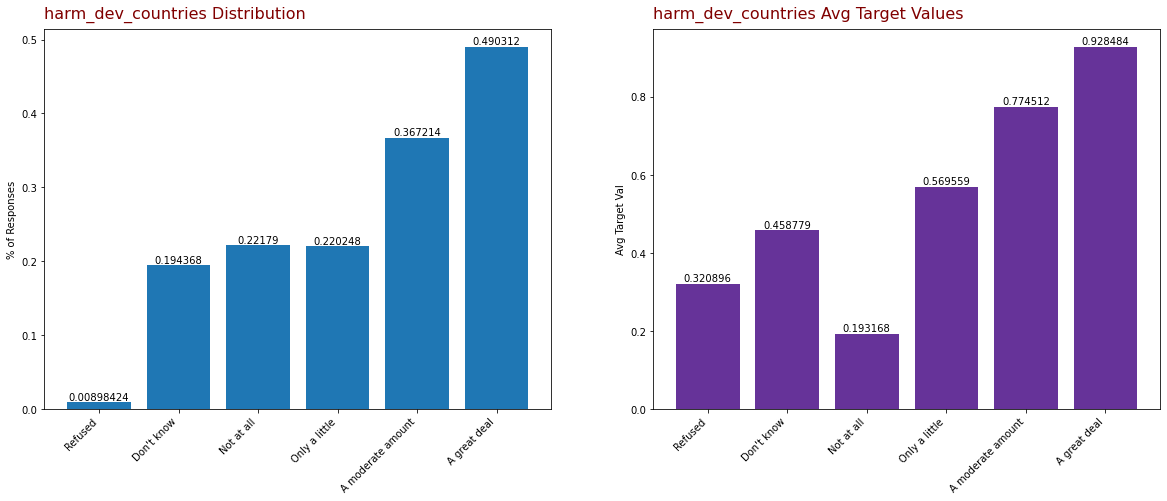

In [9]:
my_graph('harm_dev_countries', ordinals)

**Observation**


#### `harm_future_gen`

In [10]:
list(df.harm_future_gen.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused']

In [11]:
df.harm_future_gen.value_counts(normalize = True)

A great deal         0.464311
A moderate amount    0.192630
Don't know           0.119022
Not at all           0.116301
Only a little        0.102115
Refused              0.005621
Name: harm_future_gen, dtype: float64

In [12]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [13]:
df.harm_future_gen = df.harm_future_gen.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

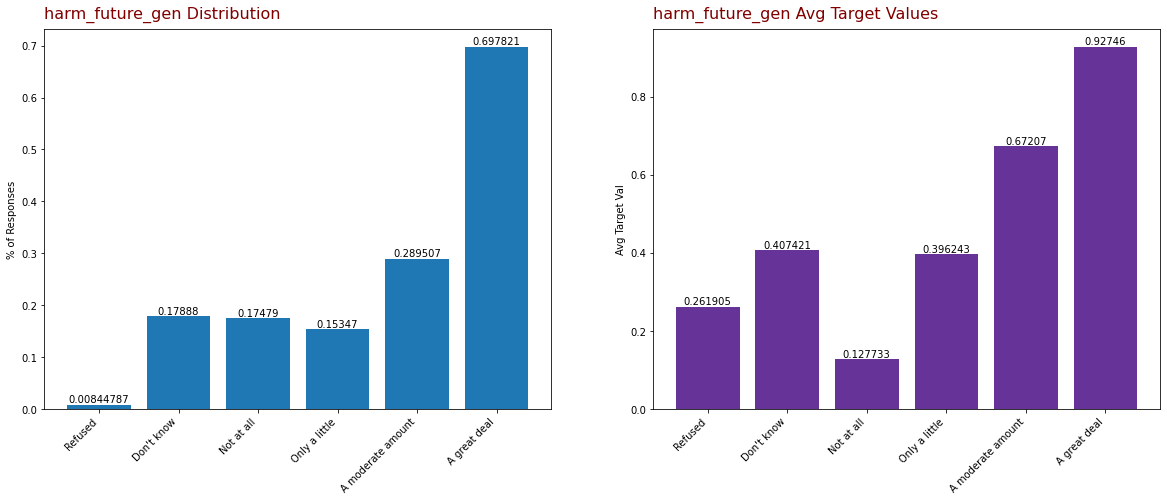

In [14]:
my_graph('harm_future_gen', ordinals)

#### `harm_plants_animals`

In [15]:
list(df.harm_plants_animals.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused',
 nan]

In [16]:
df.harm_plants_animals.isnull().sum() / df.shape[0]

0.05933261955745896

In [17]:
df.harm_plants_animals.value_counts(normalize = True)

A great deal         0.453381
A moderate amount    0.200512
Not at all           0.117139
Only a little        0.112539
Don't know           0.110073
Refused              0.006355
Name: harm_plants_animals, dtype: float64

In [18]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [19]:
df.harm_plants_animals = df.harm_plants_animals.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

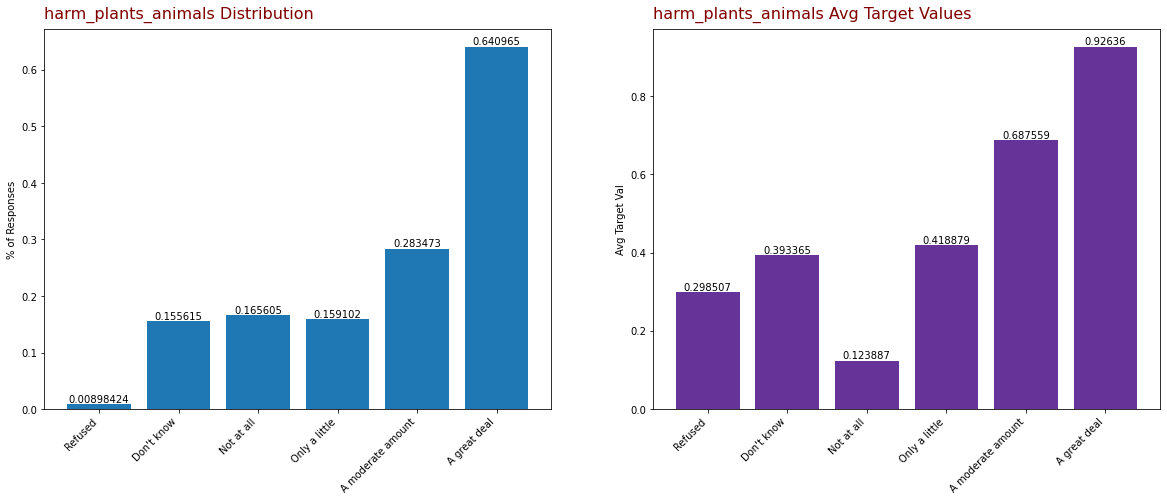

In [20]:
my_graph('harm_plants_animals', ordinals)

#### `when_harm_us`

In [21]:
list(df.when_harm_US.unique())

['In 10 years',
 'In 50 years',
 'Never',
 'In 25 years',
 'In 100 years',
 'They are being harmed now',
 'Refused']

In [22]:
df.when_harm_US.value_counts(normalize = True)

They are being harmed now    0.343995
Never                        0.172823
In 25 years                  0.128346
In 100 years                 0.119602
In 50 years                  0.116569
In 10 years                  0.109431
Refused                      0.009234
Name: when_harm_US, dtype: float64

In [23]:
ordinals = ['Refused', '', 'Never', 'In 100 years', 'In 50 years', 'In 25 years'
            , 'In 10 years','They are being harmed now']

In [24]:
df.when_harm_US = df.when_harm_US.replace(
                                {val: i for i,val in zip(range(-1,7),ordinals)})

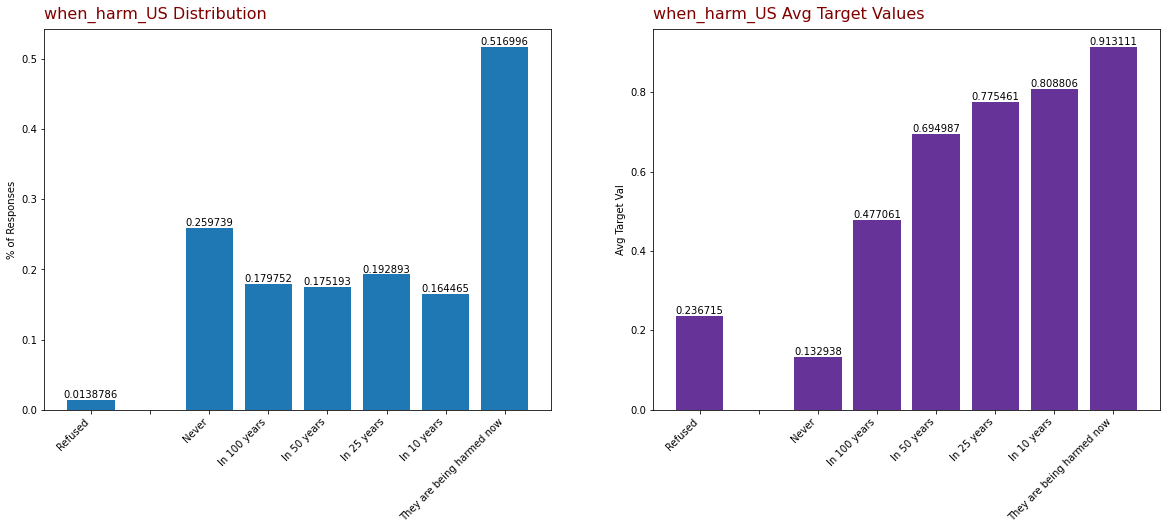

In [26]:
my_graph('when_harm_US', ordinals)

#### `reg_CO2_pollutant`

In [27]:
list(df.reg_CO2_pollutant.unique())

['Strongly support',
 'Somewhat support',
 'Somewhat oppose',
 'Strongly oppose',
 'Refused',
 nan]

In [28]:
df.reg_CO2_pollutant.isnull().sum()/df.shape[0]

0.045057102069950034

In [29]:
df.reg_CO2_pollutant.value_counts(normalize = True)

Somewhat support    0.448706
Strongly support    0.282584
Somewhat oppose     0.143184
Strongly oppose     0.100299
Refused             0.025227
Name: reg_CO2_pollutant, dtype: float64

In [30]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [31]:
df.reg_CO2_pollutant = df.reg_CO2_pollutant.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

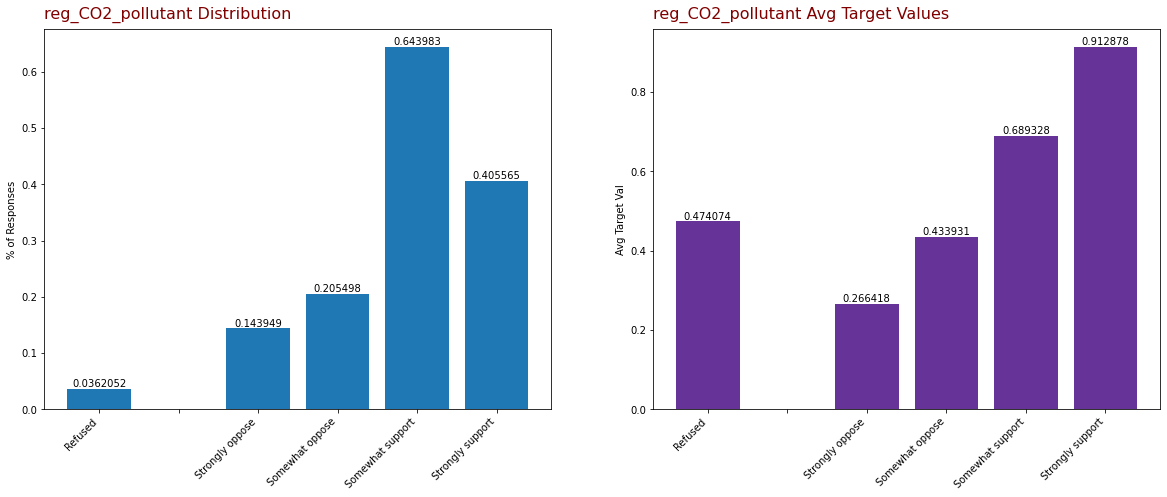

In [32]:
my_graph('reg_CO2_pollutant', ordinals)

#### `reg_utilities`

In [33]:
list(df.reg_utilities .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused',
 nan]

In [34]:
df.reg_utilities.isnull().sum() / df.shape[0]

0.22421484653818702

In [35]:
df.reg_utilities.value_counts(normalize = True)

Somewhat support    0.385624
Strongly support    0.232490
Somewhat oppose     0.200058
Strongly oppose     0.153882
Refused             0.027947
Name: reg_utilities, dtype: float64

In [36]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [37]:
df.reg_utilities = df.reg_utilities.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

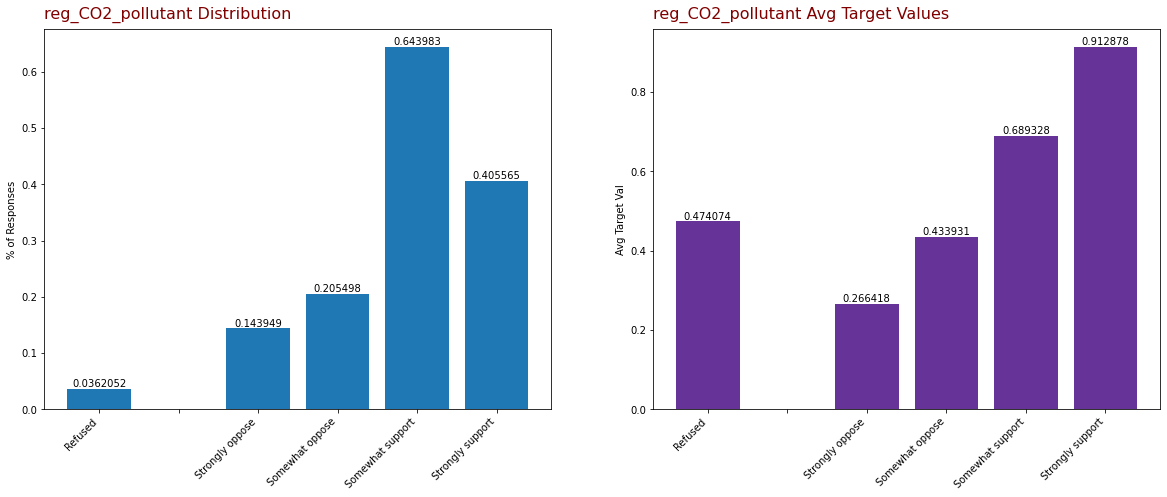

In [38]:
my_graph('reg_CO2_pollutant', ordinals)

#### `fund_research`

In [39]:
list(df.fund_research .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused']

In [40]:
df.fund_research.value_counts(normalize = True)

Somewhat support    0.410332
Strongly support    0.405782
Somewhat oppose     0.098546
Strongly oppose     0.061162
Refused             0.024179
Name: fund_research, dtype: float64

In [41]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [42]:
df.fund_research = df.fund_research.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

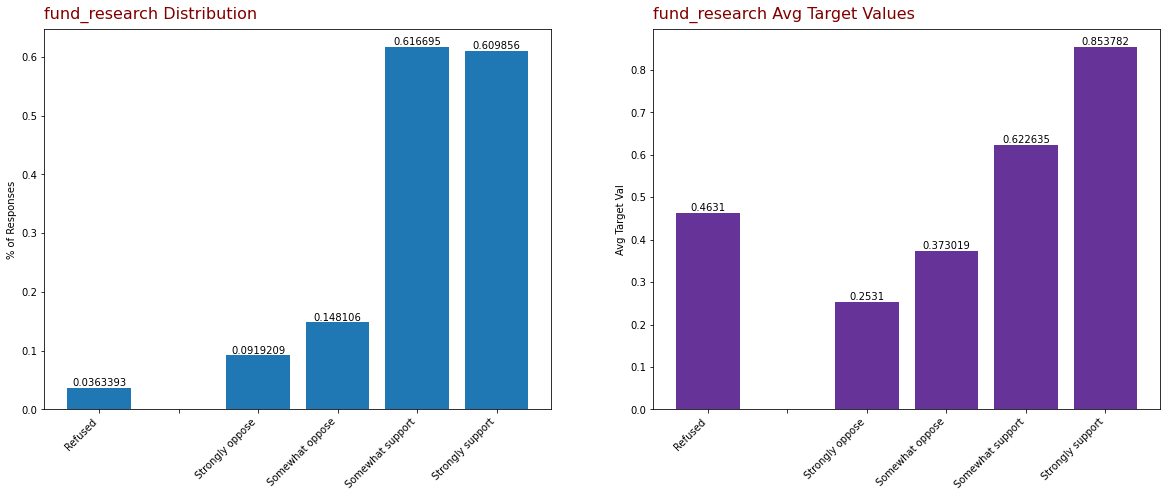

In [43]:
my_graph('fund_research', ordinals)

#### `reg_coal_emissions` DROPPED

In [44]:
list(df.reg_coal_emissions .unique())

[nan,
 'Strongly oppose',
 'Strongly support',
 'Somewhat support',
 'Refused',
 'Somewhat oppose']

In [45]:
df.reg_coal_emissions.isnull().sum() / df.shape[0]

0.405870806566738

**Note** There are too many nulls in this attribute. Drop it

In [50]:
df.drop('reg_coal_emissions', axis = 1, inplace=True)

#### `discuss_GW`

In [51]:
list(df.discuss_GW.unique())

['Occasionally', 'Rarely', 'Never', 'Often', 'Refused']

In [52]:
df.discuss_GW.value_counts(normalize = True)

Rarely          0.367104
Occasionally    0.300143
Never           0.280559
Often           0.048671
Refused         0.003524
Name: discuss_GW, dtype: float64

In [53]:
ordinals = ['Refused', '', 'Never', 'Rarely', 'Occasionally', 'Often']

In [54]:
df.discuss_GW = df.discuss_GW.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

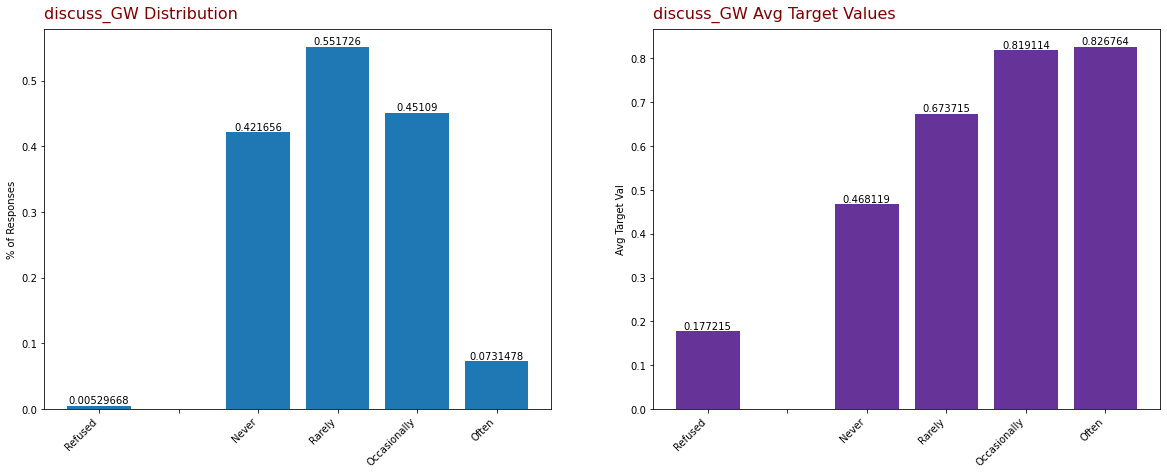

In [55]:
my_graph('discuss_GW', ordinals)

#### `hear_GW_media` DROPPED

In [56]:
list(df.hear_GW_media .unique())

[nan,
 'Once a year or less often',
 'Several times a year',
 'At least once a week',
 'Never',
 'At least once a month',
 'Not sure',
 'Refused']

In [57]:
df.hear_GW_media.isnull().sum() / df.shape[0]

0.6092523197715917

**Note** There are too many nulls in this attribute. Drop it

In [58]:
df.drop('hear_GW_media', axis = 1, inplace=True)

#### `gender`

In [59]:
list(df.gender .unique())

['Female', 'Male']

In [60]:
df.gender.value_counts(normalize = True)

Female    0.507316
Male      0.492684
Name: gender, dtype: float64

In [61]:
df.gender = [int(val == 'Female') for val in df.gender]

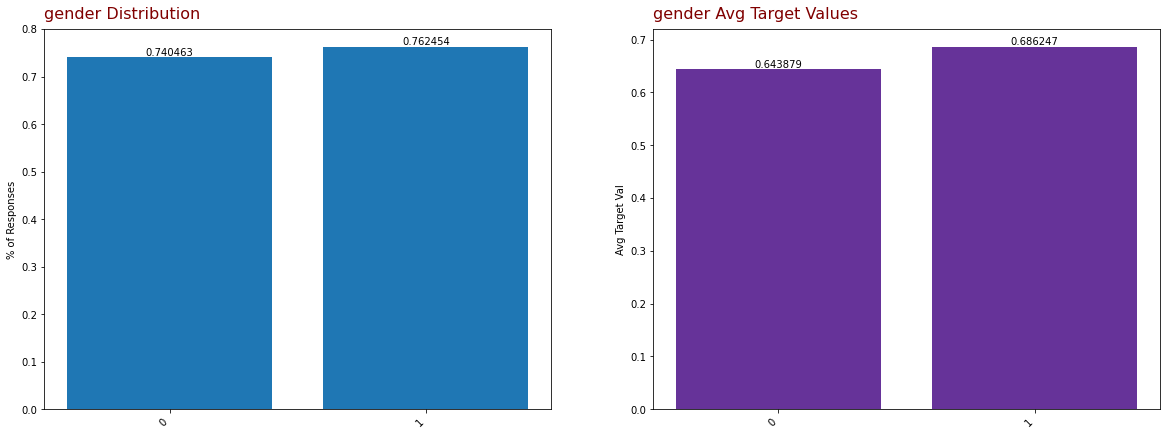

In [63]:
my_graph('gender', [0,1])

#### `age`

In [64]:
df.age.describe()

count    22416.000000
mean        50.445530
std         16.818072
min         18.000000
25%         37.000000
50%         52.000000
75%         64.000000
max         97.000000
Name: age, dtype: float64

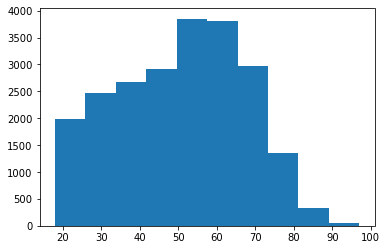

In [65]:
plt.hist(df.age);

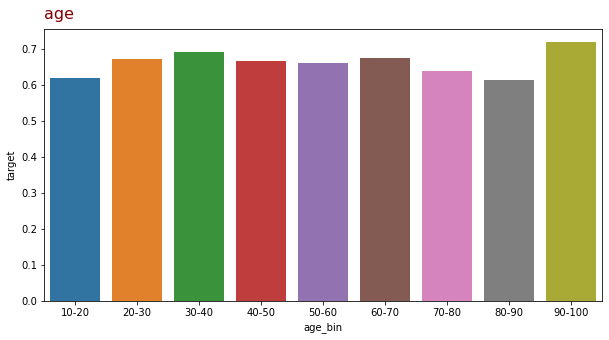

In [66]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

df['age_bin'] = pd.cut(df['age'], bins = range(10,101,10)
                       , labels=[f'{l}-{l+10}' for l in range(10,91,10)])\
                    .rename('age_bin')

sns.barplot(x = 'age_bin', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### `age_category`

In [67]:
list(df.age_category.unique())

['55+ years', '35-54 years', '18-34 years']

In [68]:
df.age_category.value_counts(normalize = True)

55+ years      0.449277
35-54 years    0.337304
18-34 years    0.213419
Name: age_category, dtype: float64

In [69]:
df = df.join(pd.get_dummies(df.age_category, prefix='age_category', 
                            drop_first=True))

df.columns[-2:]

Index(['age_category_35-54 years', 'age_category_55+ years'], dtype='object')

In [70]:
df.rename(columns = {df.columns[-2]:'age_category_35_54', 
                     df.columns[-1]: 'age_category_55_plus'}, 
          inplace=True)

df.columns[-2:]

Index(['age_category_35_54', 'age_category_55_plus'], dtype='object')

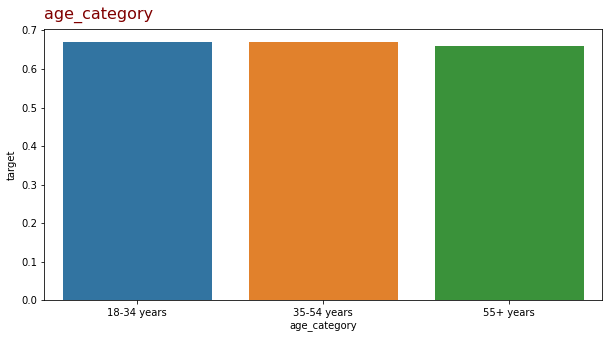

In [71]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

sns.barplot(x = 'age_category', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age_category", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');